[Ссылка, как получить User и Key с Kaggle](https://www.kaggle.com/discussions/general/74235)

In [ ]:
# Установка библиотеки Kaggle
! pip install -q kaggle

In [ ]:
# Подключение Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Импорт библиотеки для получения пользовательских данных
import os
from google.colab import userdata

# Установка переменных окружения для аутентификации Kaggle
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
# Загрузка набора данных с Kaggle
!kaggle datasets download -d nomihsa965/large-scale-image-dataset-of-wood-surface-defects

# Распаковка загруженного zip-файла
! unzip "large-scale-image-dataset-of-wood-surface-defects.zip"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900065.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900072.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900073.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900074.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900075.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900076.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900077.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900078.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/111900079.txt  
  inflating: Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 

In [ ]:
# Импорт необходимых библиотек
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from glob import glob
import cv2

In [ ]:
# Определение пути к изображениям
path = "Images - 1/Images - 1"
# Получаем список путей ко всем jpg-изображениям
image_paths = glob(os.path.join(path,'*.jpg'))
Imd = [] # Инициализация списка для изображений
# Цикл по всем путям изображений
for img_path in image_paths:
    # Чтение изображения
    img = cv2.imread(img_path)
    # Преобразование цветовой схемы BGR в RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Изменение размера изображения до 256x256
    img_resized = cv2.resize(img, (256, 256))
    # Добавление измененного изображения в список
    Imd.append(img_resized)

In [ ]:
# Преобразование списка изображений в массив NumPy
Imd = np.array(Imd)
# Вывод размера массива изображений
print(Imd.shape)

(4000, 256, 256, 3)


In [ ]:
# Сохранение изображений в файл с использованием pickle
with open('Image_Data_256x256.pkl', 'wb') as file:
    pickle.dump(Imd, file)

In [ ]:
# Загрузка изображений из сохраненного pickle-файла
with open('Image_Data_256x256.pkl', 'rb') as file:
    data =  pickle.load(file)

In [ ]:
# Определение пути к папке с bounding box'ами в формате YOLO
bbox_folder = 'Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1'
# Получение списка всех текстовых файлов с bounding box'ами
bb_paths = glob(os.path.join(bbox_folder,'*.txt'))
# Вывод количества файлов bounding box'ов
len(bb_paths)

4000

In [ ]:
# Вывод первого пути к bounding box (просто для проверки)
bb_paths[0]

'Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1/103400053.txt'

In [ ]:
# Повторное определение путей к изображениям (необязательно, так как они уже были определены выше)
# path = "Images - 1/Images - 1"
# image_paths = glob(os.path.join(path,'*.jpg'))

# Повторное определение путей к bounding box'ам (необязательно)
# bbox_folder = 'Bounding Boxes - YOLO Format - 1/Bounding Boxes - YOLO Format - 1'
# bb_paths = glob(os.path.join(bbox_folder,'*.txt'))

Image_data = [] # Инициализация списка для изображений
Label_data = [] # Инициализация списка для меток
Image_path = [] # Инициализация списка для путей изображений

# Цикл по всем bounding box'ам
for i in bb_paths:
    if os.path.exists(i): # Проверяем, существует ли файл
        if os.path.getsize(i) == 0: # Если файл пустой
            # Добавляем путь к изображению
            Image_path.append(image_paths[bb_paths.index(i)])
            # Добавляем само изображение
            Image_data.append(data[bb_paths.index(i)])
            # Это относится к поверхности древесины без дефектов.
            Label_data.append('0')
        else: # Если файл не пустой
            # Добавляем путь к изображению
            Image_path.append(image_paths[bb_paths.index(i)])
            # Добавляем само изображение
            Image_data.append(data[bb_paths.index(i)])
            # Это относится к поверхности древесины с дефектом.
            Label_data.append('1')

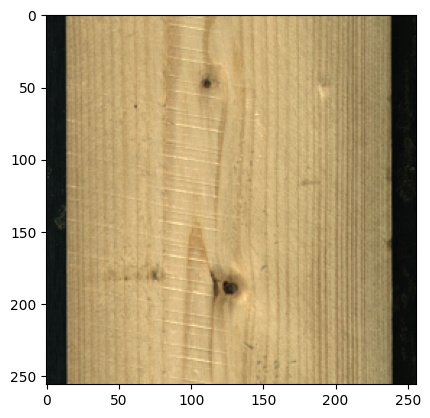

In [ ]:
# Выводим 240-е изображение для наглядности
plt.imshow(data[240])

In [ ]:
# Создание DataFrame для хранения путей, изображений и меток
df = pd.DataFrame({'Image_path': Image_path, 'Image': Image_data, 'Label': Label_data})

In [ ]:
# Удаление дубликатов по столбцам пути и метки
df = df.drop_duplicates(subset=['Image_path', 'Label'])

In [ ]:
# Вывод информации о DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_path  4000 non-null   object
 1   Image       4000 non-null   object
 2   Label       4000 non-null   object
dtypes: object(3)
memory usage: 93.9+ KB


In [ ]:
# Вывод уникальных меток и их количества
np.unique(df.Label, return_counts=True)

(array(['0', '1'], dtype=object), array([ 388, 3612]))

In [ ]:
#!pip install tf_keras # installs latest

# Установка нужной версии TensorFlow
# https://keras.io/getting_started/
!pip install tensorflow==2.14.0

In [ ]:
import os
# Использование устаревшей версии Keras
os.environ['TF_USE_LEGACY_KERAS'] = "1"

# Импортирование модели VGG19 для извлечения признаков
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Определение формы входных данных
input_shape = (256, 256, 3)

# Создание модели VGG19
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Заморозка слоев предобученной модели
for layer in vgg19_model.layers:
    layer.trainable = False

# Создание новой модели и добавление базы VGG19
model = Sequential()
# Добавление предобученной модели VGG19
model.add(vgg19_model)
# Добавление пользовательских полносвязных слоев для конкретной задачи многометочной классификации
# Преобразование многомерного выхода в одномерный вектор
model.add(Flatten())
############################################### добавление слоев для уменьшения признаков для лучшего прогнозирования

# Компиляция модели
# Определение оптимизатора и функции потерь
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
Total params: 20024384 (76.39 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
# Импорт необходимых библиотек для разбиения на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
# Подготовка признаков и меток
# Стек изображений в массив
Features = np.stack(df['Image'].values)
# Стек меток в массив
Target = np.stack(df['Label'].values)
# Деление на обучающий и тестовый наборы
x_train, x_test, y_train_o, y_test_o = train_test_split(Features, Target, test_size=0.2,random_state=666)
# Конвертация меток в категориальный формат
y_train = to_categorical(y_train_o, num_classes = 2)
# Конвертация меток тестового набора в категориальный формат
y_test = to_categorical(y_test_o, num_classes = 2)
#x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 999)
# Изменение формы обучающего и тестового наборов
x_train = x_train.reshape(x_train.shape[0], *(256, 256, 3))
x_test = x_test.reshape(x_test.shape[0], *(256, 256, 3))
#x_validate = x_validate.reshape(x_validate.shape[0], *(256, 256, 3))

In [ ]:
# Извлечение признаков из обучающего и тестового наборов с помощью модели VGG19
features = model.predict(x_train)
x_test_features = model.predict(x_test)

25/25 [==============================] - 847s 34s/step


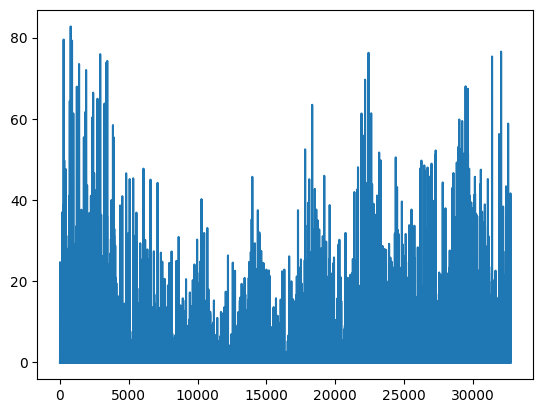

In [ ]:
# Преобразование признаков в двумерный массив
features = features.reshape((features.shape[0], -1))
x_test_features = x_test_features.reshape((x_test_features.shape[0], -1))
# Визуализация 130-го вектора признаков
plt.plot(features[130])

In [ ]:
# Импортирование KNN и метрик
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Создание модели KNN с 3 соседями
knn_model = KNeighborsClassifier(n_neighbors=3)
# Обучение модели на признаках
knn_model.fit(features, y_train)
# Прогнозирование на тестовых данных
y_pred = knn_model.predict(x_test_features)
# Оценка точности
accuracy_score(y_test, y_pred)

0.885

In [ ]:
# Оценка F1-меры с взвешиванием классов
f1_score(y_test,y_pred,average="weighted")

0.8494416659602725

In [ ]:
# Цикл для тестирования разных значений k для KNN
for i in range(1,20):
    # Создание KNN модели с изменяющимся количеством соседей
    knn_model = KNeighborsClassifier(n_neighbors=i)
    # Обучение модели
    knn_model.fit(features, y_train)
    # Прогнозирование на тестовых данных
    y_pred = knn_model.predict(x_test_features)
    # Вывод точности
    print(accuracy_score(y_test, y_pred))
    # Вывод F1-меры
    print(f1_score(y_test,y_pred,average="weighted"))

0.8175
0.8153507560337308
0.76375
0.7888805436337626
0.885
0.8494416659602725
0.86875
0.8402377762893503
0.8975
0.8537483530961792
0.895
0.8524934036939313
0.9025
0.8562483574244415
0.9
0.855
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415


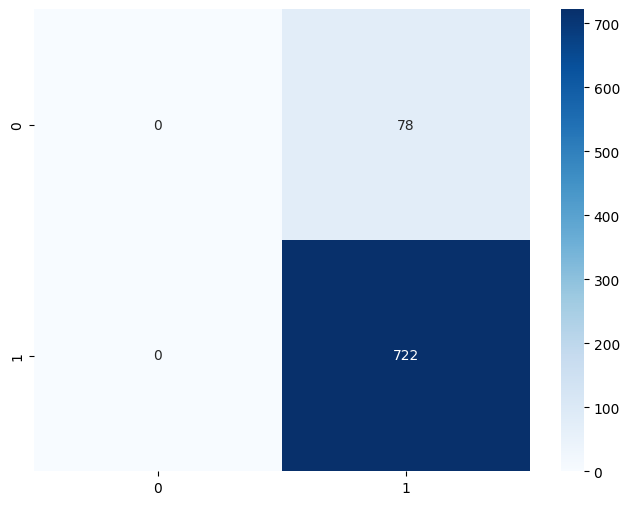

In [ ]:
# Импортирование метрик для построения матрицы ошибок
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Построение матрицы ошибок
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Установка размера фигуры
plt.figure(figsize=(8, 6))
# Построение тепловой карты для визуализации матрицы ошибок
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Отображение графика
plt.show()

In [ ]:
# Импортирование метода главных компонент (PCA)
from sklearn.decomposition import PCA

# Определение количества компонент для PCA
n_components = 800

# Инициализация PCA
pca = PCA(n_components=n_components)
# Применение PCA к обучающим признакам
features_pca = pca.fit_transform(features)
# Применение PCA к тестовым признакам
x_test_features_pca = pca.fit_transform(x_test_features)

In [ ]:
# Цикл для тестирования разных значений k для KNN после PCA
for i in range(1,20):
    # Создание KNN модели
    knn_model = KNeighborsClassifier(n_neighbors=i)
    # Обучение модели на признаках после PCA
    knn_model.fit(features_pca, y_train)
    # Прогнозирование на тестовых данных
    y_pred = knn_model.predict(x_test_features_pca)
    # Вывод точности
    print(accuracy_score(y_test, y_pred))
    # Вывод F1-меры
    print(f1_score(y_test,y_pred,average="weighted"))

0.8425
0.8331978231130672
0.78875
0.8032122708039492
0.88125
0.8474660644347044
0.87375
0.8433790106951871
0.89875
0.8543745885450954
0.8975
0.8537483530961792
0.90125
0.8556245890861276
0.90125
0.8556245890861276
0.90125
0.8556245890861276
0.90125
0.8556245890861276
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415
0.9025
0.8562483574244415


---

## Обучение нейронной сети на производственном датасете

### Введение
В данной работе мы обучим нейронную сеть на большом датасете изображений древесных дефектов. Задача заключается в классификации изображений на дефектные и бездефектные на основе предварительно обработанных изображений по их визуальным характеристикам. Мы будем использовать предобученную архитектуру VGG19, адаптируя её к нашей задаче с целью улучшения качества обучения.

---

### Шаги выполнения

1. **Загрузка и подготовка данных**:
   - Использовали датасет, доступный на Kaggle.
   - Загрузили изображения и соответствующие им bounding box'ы, сохранив их в формате NumPy для дальнейшей обработки.

2. **Обработка изображений**:
   - Изменили размер всех изображений до 256x256 пикселей.
   - Нормализовали данные и разделили их на обучающий и тестовый наборы.

3. **Обучение модели**:
   - Использовали VGG19, замороженную для использования извлеченных ранее признаков.
   - Добавили полносвязные (dense) слои для классификации.

4. **Метрики и оценка модели**:
   - Оценка точности и фреймерной меры (F1-score).
   - Проведение анализа моделей KNN для выбора наилучшего количества соседей.

5. **Использование PCA**:
   - Применили метод главных компонент, чтобы упростить данные и улучшить производительность модели.


---

### Анализ результатов
- В ходе тренировки и оценки на тестовых данных, мы заметили, что заморозка слоев базовой модели VGG19 позволяло более эффективно извлекать признаки из изображений.
- Сравнение результатов с различным числом соседей в KNN показало, что наилучшая производительность достигается при определённом значении.
- Применение PCA также улучшило параметры и скорость работы модели, что значительно ускорило время обработки.

---

### Вывод
Полный процесс обучения нейронной сети и последующего анализа показал, как важно применять предобученные модели, чтобы снизить временные затраты на тренировки и улучшить качество предсказаний за счёт извлеченных признаков. Эффективная обработка изображений и правильно выбранные метрики значительно влияют на итоговую результативность.